In [2]:
import urllib.request
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
filename = 'auto-mpg.data'
urllib.request.urlretrieve(url, filename)

('auto-mpg.data', <http.client.HTTPMessage at 0x1dbae487130>)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
cols = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv('auto-mpg.data', names=cols, na_values='?',
                comment= '\t',
                sep=" ",
                skipinitialspace=True)

data = df.copy()

In [8]:
df.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [9]:
data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [10]:
data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


<AxesSubplot:xlabel='Horsepower'>

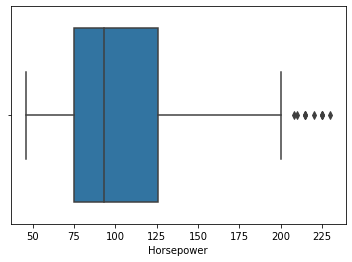

In [11]:
sns.boxplot(x=data['Horsepower'])

In [13]:
median = data['Horsepower'].median()
data['Horsepower'] = data['Horsepower'].fillna(median)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [15]:
data['Cylinders'].value_counts() /  len(data)


4    0.512563
8    0.258794
6    0.211055
3    0.010050
5    0.007538
Name: Cylinders, dtype: float64

In [16]:
data['Origin'].value_counts()

1    249
3     79
2     70
Name: Origin, dtype: int64

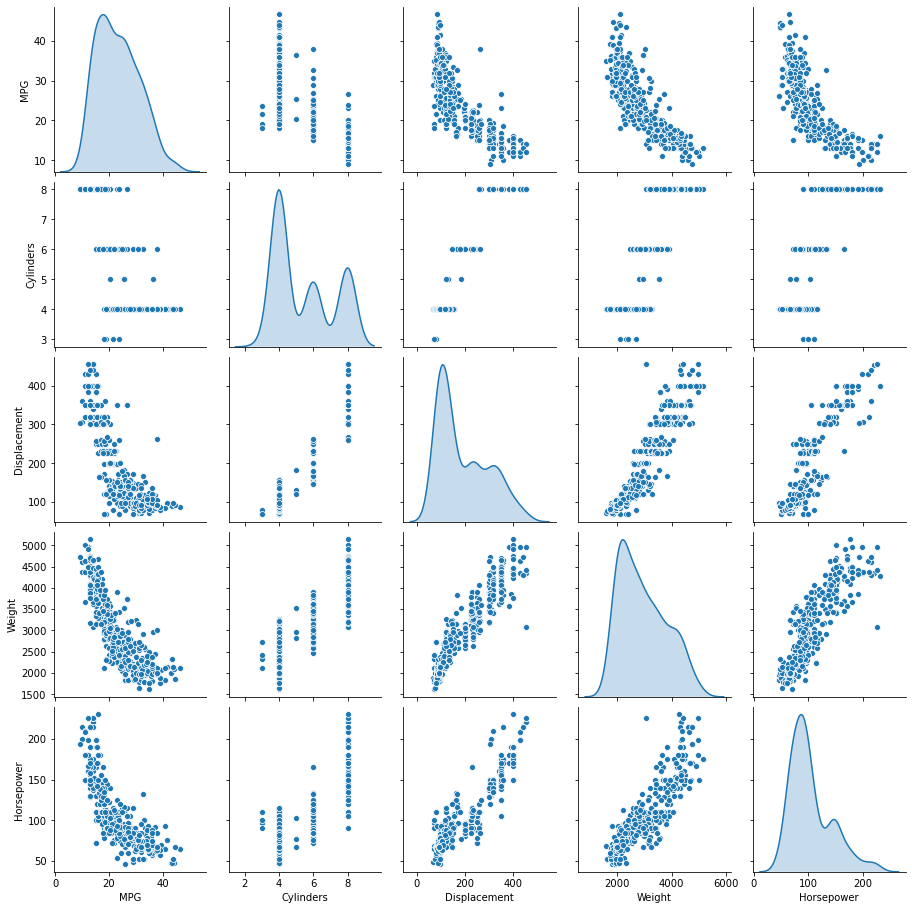

In [17]:
sns.pairplot(data[['MPG', 'Cylinders', 'Displacement', 'Weight', 'Horsepower']], diag_kind='kde')

In [76]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

test_set.shape

(80, 12)

In [ ]:
train_set['']

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data["Cylinders"]):
    train_set = data.loc[train_index]
    test_set = data.loc[test_index]

In [40]:
train_set['Cylinders'].value_counts() / len(strat_train_set)

4    0.512579
8    0.257862
6    0.210692
5    0.009434
3    0.009434
Name: Cylinders, dtype: float64

In [41]:
test_set['Cylinders'].value_counts() / len(strat_test_set)

4    0.5125
8    0.2625
6    0.2125
3    0.0125
Name: Cylinders, dtype: float64

In [62]:
train_set['Origin'] = train_set['Origin'].map({1: 'India', 2: 'USA', 3: 'Germany'})
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
145,32.0,4,83.0,61.0,2003.0,19.0,74,Germany
151,31.0,4,79.0,67.0,2000.0,16.0,74,USA
388,26.0,4,156.0,92.0,2585.0,14.5,82,India
48,18.0,6,250.0,88.0,3139.0,14.5,71,India
114,26.0,4,98.0,90.0,2265.0,15.5,73,USA


In [64]:
train_set = pd.get_dummies(train_set, prefix='', prefix_sep='')
train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Germany,India,USA
145,32.0,4,83.0,61.0,2003.0,19.0,74,1,0,0
151,31.0,4,79.0,67.0,2000.0,16.0,74,0,0,1
388,26.0,4,156.0,92.0,2585.0,14.5,82,0,1,0
48,18.0,6,250.0,88.0,3139.0,14.5,71,0,1,0
114,26.0,4,98.0,90.0,2265.0,15.5,73,0,0,1


In [65]:
data['displacement_on_power'] = data['Displacement'] / data['Horsepower']
data['weight_on_cylinder'] = data['Weight'] / data['Cylinders']
data['acceleration_on_power'] = data['Acceleration'] / data['Horsepower']
data['acceleration_on_cylinder'] = data['Acceleration'] / data['Cylinders']

corr_matrix = data.corr()
corr_matrix['MPG'].sort_values(ascending=False)

MPG                         1.000000
acceleration_on_cylinder    0.732133
acceleration_on_power       0.704240
Model Year                  0.579267
Origin                      0.563450
Acceleration                0.420289
weight_on_cylinder         -0.020778
displacement_on_power      -0.577236
Horsepower                 -0.773453
Cylinders                  -0.775396
Displacement               -0.804203
Weight                     -0.831741
Name: MPG, dtype: float64

In [71]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
data_cat_1hot = cat_encoder.fit_transform(data)
data_cat_1hot

data_cat_1hot.toarray()[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
##handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(data)

SimpleImputer(strategy='median')

In [73]:
imputer.statistics_

array([2.30000000e+01, 4.00000000e+00, 1.48500000e+02, 9.35000000e+01,
       2.80350000e+03, 1.55000000e+01, 7.60000000e+01, 1.00000000e+00,
       1.67609819e+00, 5.41437500e+02, 1.70795455e-01, 3.50000000e+00])

In [74]:
data.median().values

array([2.30000000e+01, 4.00000000e+00, 1.48500000e+02, 9.35000000e+01,
       2.80350000e+03, 1.55000000e+01, 7.60000000e+01, 1.00000000e+00,
       1.67609819e+00, 5.41437500e+02, 1.70795455e-01, 3.50000000e+00])

In [75]:
X = imputer.transform(data)

In [77]:
data_tr = pd.DataFrame(X, columns=data.columns, index=data.index)

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin

acc_ix, hpower_ix, cyl_ix = 4, 2, 0

class CustomAttrAdder(BaseEstimator, TransformerMixin):
    def __init__(self, acc_on_power=True):
        self.acc_on_power = acc_on_power
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        acc_on_cyl = X[:, acc_ix] / X[:, cyl_ix]
        if self.acc_on_power:
            acc_on_power = X[:, acc_ix] / X[:, hpower_ix]
            return np.c_[X, acc_on_power, acc_on_cyl]
        
        return np.c_[X, acc_on_cyl]
    
attr_adder = CustomAttrAdder(acc_on_power=True)
data_tr_extra_attrs = attr_adder.transform(data_tr.values)
data_tr_extra_attrs[0]

array([1.80000000e+01, 8.00000000e+00, 3.07000000e+02, 1.30000000e+02,
       3.50400000e+03, 1.20000000e+01, 7.00000000e+01, 1.00000000e+00,
       2.36153846e+00, 4.38000000e+02, 9.23076923e-02, 1.50000000e+00,
       1.14136808e+01, 1.94666667e+02])

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

def num_pipeline_transformer(data):
    '''
    Function to process numerical transformations
    Argument:
        data: original dataframe
    Returns:
        num_attrs: numerical dataframe
        num_pipeline: numerical pipeline object
        
        
    '''
    numerics = ['float64', 'int64']
    
    num_attrs = data.select_dtypes(include=numerics)
    
    num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('attrs_adder', CustomAttrAdder()),
        ('std_scaler', StandardScaler()),
        ])
    return num_attrs, num_pipeline

In [82]:
from sklearn.compose import ColumnTransformer

def pipeline_transformer(data):
    '''
    Complete transformation pipeline for both
    numerical and categorical data
    
    Argument:
        data: original dataframe
    Returns:
        prepared: transformed data, ready to use
    '''
    
    cat_attrs = ['Origin']
    num_attrs, num_pipeline = num_pipeline_transformer(data)
    full_pipeline = ColumnTransformer([
        ('num', num_pipeline, list(num_attrs)),
        ('cat', OneHotEncoder(), cat_attrs),
        ])
    prepared_data = full_pipeline.fit_transform(data)
    return prepared_data

In [83]:
def preprocess_origin_cols(df):
    df['Origin'] = df['Origin'].map({1:'India', 2:'USA', 3:'Germany'})
    return df

In [87]:
preprocessed_df = preprocess_origin_cols(data)
prepared_data = pipeline_transformer(preprocessed_df)
prepared_data

array([[-0.7064387 ,  1.49819126,  1.0906037 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.09075062,  1.49819126,  1.5035143 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.7064387 ,  1.49819126,  1.19623199, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.08701694, -0.85632057, -0.56103873, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.57460104, -0.85632057, -0.70507731, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.95891297, -0.85632057, -0.71467988, ...,  0.        ,
         1.        ,  0.        ]])

In [88]:
prepared_data[0]

array([-0.7064387 ,  1.49819126,  1.0906037 ,  0.67311762,  0.63086987,
       -1.29549834, -1.62742629, -1.30087953,  0.42342354,  0.        ,
        1.        ,  0.        ])

ValueError: Found input variables with inconsistent numbers of samples: [398, 318]